# Trabalho 01 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando Bibliotecas
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing
import matplotlib.patches as patches
import warnings
from sympy.utilities.exceptions import SymPyDeprecationWarning

# Ignorar todos os warnings do SymPy
warnings.filterwarnings("ignore", category=SymPyDeprecationWarning)

init_printing()

# Atividade 03
___

Desenvolver um programa para análise e cálculo de treliças planas isostáticas.

## Relatório da Atividade
Esta atividade apresenta o desenvolvimento de um programa para modelagem e análise de treliças planas **isostáticas**. O objetivo foi criar um sistema que permita representar estruturas, calcular forças internas, reações de apoio e analisar o equilíbrio estático da estrutura. A solução foi implementada de maneira analítica.

## Critério de Isostaticidade para Treliças
Uma treliça plana é isostática se satisfizer a relação: $m=2j−r$

- 𝑚: número de barras (elementos).
- 𝑗: número de nós.
- 𝑟: número de reações de apoio.

## Estrutura do Sistema
O sistema foi projetado utilizando classes para representar os principais componentes de uma treliça: nós, forças, apoios, elementos estruturais e a treliça como um todo. Cada classe possui propriedades e métodos específicos que refletem seu comportamento no contexto estrutural.

### Classe Node
A classe Node representa os pontos de interesse da estrutura onde forças, momentos e apoios podem ser aplicados.

> Atributos:

- x, y: Coordenadas cartesianas do nó.
- id: Identificação única para facilitar a busca e manipulação dos nós.
- supports: Lista de apoios associados ao nó.
- forces: Lista de forças aplicadas ao nó.
- moments: Lista de momentos aplicados ao nó.

### Classe Force
A classe Force representa forças aplicadas nos nós, podendo ser definidas em termos de magnitude e ângulo.

> Atributos:

- magnitude: Valor da força.
- angle: Ângulo da força em relação ao eixo x.

> Propriedades:

- fx: Calcula a componente horizontal da força.
- fy: Calcula a componente vertical da força.

### Classe Support
A classe Support é responsável por representar os apoios de um nó, definindo restrições em translações ou rotações.

> Atributos:

- rx, ry, rm: Restrições em x, y e momento.
- reaction_x, reaction_y, reaction_m: Reações geradas nos apoios.

> Propriedades:

- fx, fy: Retornam as forças reativas nas direções x e y.
- order: Soma o número de graus de restrição impostos pelo apoio.

### Classe Element
A classe Element modela as vigas ou barras que conectam dois nós, representando os elementos estruturais de uma treliça.

> Atributos:

- node1, node2: Nós inicial e final que definem o elemento.
- id: Identificação única do elemento.
- internal_force: Valor da força interna (compressão ou tração).

> Propriedades:

- angle: Calcula o ângulo do elemento com o eixo x.
- length: Determina o comprimento do elemento.
- internal_forces: Calcula as forças internas baseadas na compressão ou tração.

### Classe Truss
A classe Truss organiza os nós e elementos estruturais, além de oferecer métodos para análise e cálculo do equilíbrio.

> Principais Métodos:

- find_node: Localiza um nó com base em seu identificador.
- find_element: Localiza um elemento com base em seu identificador.
- reactions: Calcula o número total de reações na estrutura.
- degrees_of_freedom: Retorna o número de graus de liberdade.
- instantiate_variables: Cria variáveis simbólicas para reações e forças internas.
- calculate_general_equations: Gera as equações gerais de equilíbrio.
- calculate_node_equations: Calcula as equações de equilíbrio para cada nó da treliça.
- analyse: Resolve o sistema de equações de equilíbrio da treliça e determina reações e forças internas.

## Fluxo de Funcionamento

1) Criação dos Nós: Inicialmente, são criados os nós com suas coordenadas, forças e apoios associados.

2) Definição dos Elementos: Em seguida, os elementos estruturais são definidos conectando os nós.

3) Configuração da Treliça: A treliça é construída a partir dos nós e elementos criados.

4) Análise: As equações de equilíbrio são geradas, e as reações e forças internas são calculadas.

%) Plotagem dos Resultados: utilizamos a biblioteca matplotlib para construir a treliça, plotar suas vigas, nós, forças e apoios.


In [ ]:
# Define a classe para representar um nó em uma estrutura
class Node:
  def __init__(self, x, y, node_id, supports=[], forces=[], moments=[]):
    # Coordenadas do nó
    self.x = x
    self.y = y
    # Identificação única do nó
    self.id = node_id
    # Lista de apoios (restrições)
    self.supports = supports
    # Lista de forças aplicadas ao nó
    self.forces = forces
    # Lista de momentos aplicados ao nó
    self.moments = moments

  # Representação das informações de um nó
  def __repr__(self):
    return f"Nó (x={self.x}, y={self.y}, Forças={self.forces}, Momentos={self.moments}, Apoios={self.supports})"

# Define a classe para representar uma força
class Force:
  def __init__(self, magnitude, angle=None):
    self.magnitude = magnitude  # Magnitude da força
    self.angle = angle          # Ângulo da força (em graus)

  @property
  # Calcula a componente x da força
  def fx(self):
    angle_rad = sp.rad(self.angle)  # Converte o ângulo para radianos
    return self.magnitude * sp.cos(angle_rad)

  @property
  # Calcula a componente y da força
  def fy(self):
    angle_rad = sp.rad(self.angle)  # Converte o ângulo para radianos
    return self.magnitude * sp.sin(angle_rad)

  # Representação das informações de uma força
  def __repr__(self):
    return f"Força (Magnitude={self.magnitude}, Ângulo={self.angle})"

# Define a classe para representar apoios (restrições)
class Support:
  def __init__(self, rx=0, ry=0, rm=0, reaction_x=None, reaction_y=None, reaction_m=None):
    # Flags indicando restrições em x, y e momento
    self.rx = rx
    self.ry = ry
    self.rm = rm
    # Reações nas direções x, y e momento (se aplicável)
    self.reaction_x = reaction_x
    self.reaction_y = reaction_y
    self.reaction_m = reaction_m

  @property
  # Calcula a força de reação na direção x
  def fx(self):
    angle = 0 if self.reaction_x >= 0 else 180  # Define o ângulo com base no sinal
    return Force(magnitude=abs(self.reaction_x), angle=angle)

  @property
  # Calcula a força de reação na direção y
  def fy(self):
    angle = 90 if self.reaction_y >= 0 else -90  # Define o ângulo com base no sinal
    return Force(magnitude=abs(self.reaction_y), angle=angle)

  @property
  # Soma das restrições impostas pelo apoio
  def order(self):
    return self.rx + self.ry + self.rm

  # Representação das informações de um apoio
  def __repr__(self):
    return (f"Apoio (rx={self.rx}, ry={self.ry}, rm={self.rm}, Reação em X={self.reaction_x}, "
            f"Reação em X={self.reaction_y}, Reação do Momento={self.reaction_m})")

# Define a classe para representar uma viga
class Element:
  def __init__(self, node1, node2, element_id, internal_force=None):
    # Nós inicial e final do elemento
    self.node1 = node1
    self.node2 = node2
    # Identificação única do elemento
    self.id = element_id
    # Força interna no elemento
    self.internal_force = internal_force

  @property
  # Calcula o ângulo do elemento em relação ao eixo x
  def angle(self, in_radians=False):
    delta_x = self.node2.x - self.node1.x
    delta_y = self.node2.y - self.node1.y
    angle_rad = sp.atan2(delta_y, delta_x)  # Ângulo em radianos

    return angle_rad if in_radians else sp.deg(angle_rad)  # Retorna em graus, se necessário

  @property
  # Calcula o ângulo na direção oposta ao eixo x
  def reverse_angle(self, in_radians=False):
    delta_x = self.node1.x - self.node2.x
    delta_y = self.node1.y - self.node2.y
    angle_rad = sp.atan2(delta_y, delta_x)

    return angle_rad if in_radians else sp.deg(angle_rad)

  @property
  # Determina as forças internas no elemento (compressão ou tração)
  def internal_forces(self):
    # Compressão
    if self.internal_force <= 0:
        return [
            Force(abs(self.internal_force), self.angle),
            Force(abs(self.internal_force), self.reverse_angle)
        ]
    # Tensão
    else:
        return [
            Force(self.internal_force, self.reverse_angle),
            Force(self.internal_force, self.angle)
        ]

  # Calcula as componentes da força no nó fornecido
  def components(self, node, variable):
    if self.node1.id == node.id:
        delta_x = self.node2.x - self.node1.x
        delta_y = self.node2.y - self.node1.y
    else:
        delta_x = self.node1.x - self.node2.x
        delta_y = self.node1.y - self.node2.y

    hypotenuse = sp.sqrt(delta_x**2 + delta_y**2)   # Comprimento do elemento
    cos = delta_x / hypotenuse                      # Cosseno do ângulo
    sin = delta_y / hypotenuse                      # Seno do ângulo

    return variable * cos, variable * sin

  @property
  # Calcula o comprimento do elemento
  def length(self):
    delta_x = self.node2.x - self.node1.x
    delta_y = self.node2.y - self.node1.y
    return sp.sqrt(delta_x**2 + delta_y**2)

  # Representação das informações de uma viga
  def __repr__(self):
    return (f"Viga (Nó inicial=({self.node1.x}, {self.node1.y}), Nó Final=({self.node2.x}, {self.node2.y}), "
            f"Força Interna={self.internal_force}, Ângulo={self.angle})")

# Classe que representa uma treliça
class Truss:
  def __init__(self, nodes, elements):
    self.nodes = nodes
    self.elements = elements
    self.truss_ = None

  # Retorna o nó com o ID especificado
  def find_node(self, node_id):
    for node in self.nodes:
        if node.id == node_id:
            return node
    return None

  # Retorna o elemento com o ID especificado
  def find_element(self, element_id):
    for element in self.elements:
        if element.id == element_id:
            return element
    return None

  # Retorna uma lista de elementos conectados ao nó especificado
  def find_elements_connected_to_node(self, node_id):
    connected_elements = []
    for element in self.elements:
        if element.node1.id == node_id or element.node2.id == node_id:
            connected_elements.append(element)
    return connected_elements

  @property
  # Calcula o número total de reações nos apoios da treliça
  def reactions(self):
    return sum([support.order for node in self.nodes for support in node.supports])

  @property
  # Retorna o número de graus de liberdade da treliça
  def degrees_of_freedom(self):
    return len(self.nodes)

  # Cria variáveis simbólicas para as reações e forças internas das vigas
  def instantiate_variables(self):
    # Reações de apoio em x, y e momentos
    Rx = {sp.symbols(f"Rx_{node.id}"): node for node in self.nodes for support in node.supports if support.rx}
    Ry = {sp.symbols(f"Ry_{node.id}"): node for node in self.nodes for support in node.supports if support.ry}
    Rm = {sp.symbols(f"Rm_{node.id}"): node for node in self.nodes for support in node.supports if support.rm}
    # Forças internas nos elementos
    forces_vars = {sp.symbols(f"Viga_{element.id}"): element for element in self.elements}

    return Rx, Ry, Rm, forces_vars

  # Calcula as equações gerais de equilíbrio (Soma de forças e momentos)
  def calculate_general_equations(self):
    # Soma das forças externas aplicadas em x e y
    forces_x = sum([force.fx for node in self.nodes for force in node.forces])
    forces_y = sum([force.fy for node in self.nodes for force in node.forces])
    # Soma dos momentos gerados pelas forças aplicadas
    moments_x = sum([-force.fx * node.y for node in self.nodes for force in node.forces])
    moments_y = sum([force.fy * node.x for node in self.nodes for force in node.forces])
    moments = sum([moment for node in self.nodes for moment in node.moments])
    # Reações nos apoios
    Rx = [sp.symbols(f"Rx_{node.id}") for node in self.nodes for support in node.supports if support.rx]
    Ry = [sp.symbols(f"Ry_{node.id}") for node in self.nodes for support in node.supports if support.ry]
    Rm = [sp.symbols(f"Rm_{node.id}") for node in self.nodes for support in node.supports if support.rm]
    # Momentos devido às reações
    Rx_m = [-sp.symbols(f"Rx_{node.id}") * node.y for node in self.nodes for support in node.supports if support.rx]
    Ry_m = [sp.symbols(f"Ry_{node.id}") * node.x for node in self.nodes for support in node.supports if support.ry]
    # Equações de equilíbrio
    self.Sx = sp.Eq(sum(Rx) + forces_x, 0)
    self.Sy = sp.Eq(sum(Ry) + forces_y, 0)
    self.Sm = sp.Eq(sum(Rm) + sum(Rx_m) + sum(Ry_m) + moments_x + moments_y + moments, 0)

    return self.Sx, self.Sy, self.Sm

  # Calcula as equações de equilíbrio para cada nó da treliça
  def calculate_node_equations(self):
    equations = []
    forces_vars = {element.id: sp.symbols(f"Viga_{element.id}") for element in self.elements}

    for node in self.nodes:
        elements = self.find_elements_connected_to_node(node.id)
        components = [element.components(node, forces_vars[element.id]) for element in elements]

        # Componentes das forças internas dos elementos
        Ex = sum([comp[0] for comp in components])
        Ey = sum([comp[1] for comp in components])

        # Forças externas no nó
        forces_x = sum([force.fx for force in node.forces])
        forces_y = sum([force.fy for force in node.forces])

        # Reações de apoio no nó
        Rx = [sp.symbols(f"Rx_{node.id}") for support in node.supports if support.rx]
        Ry = [sp.symbols(f"Ry_{node.id}") for support in node.supports if support.ry]

        # Equações de equilíbrio em x e y
        Sx = sp.Eq(Ex + sum(Rx) + forces_x, 0)
        Sy = sp.Eq(Ey + sum(Ry) + forces_y, 0)

        equations.append(Sx)
        equations.append(Sy)

    return equations

  # Resolve o sistema de equações de equilíbrio da treliça e determina reações e forças internas
  def analyze(self):
    Rx, Ry, Rm, forces_vars = self.instantiate_variables()
    Sx, Sy, Sm = self.calculate_general_equations()
    eq_forces = self.calculate_node_equations()

    # Criação do sistema de equações
    system = sp.Matrix(eq_forces + [Sx, Sy, Sm])
    solution = sp.solve(system, list(forces_vars.keys()) + list(Rx) + list(Ry) + list(Rm))

    # Atualiza as reações e forças internas com os valores da solução
    for var, node in Rx.items():
        node.supports[0].reaction_x = round(float(solution[var]), 2)

    for var, node in Ry.items():
        node.supports[0].reaction_y = round(float(solution[var]), 2)

    for var, node in Rm.items():
        node.supports[0].reaction_m = round(float(solution[var]), 2)

    for var, element in forces_vars.items():
        element.internal_force = round(float(solution[var]), 2)

    return system, solution

# Função para plotagem das forças
def plot_force(force, x, y, scale=1, color='r', zorder=3, entering=False):
  # Verifica se a magnitude da força é diferente de zero
  if force.magnitude != 0:
    # Calcula o ângulo da força em radianos
    angle_rad = np.radians(float(force.angle))
    # Calcula os deslocamentos (dx, dy) para o vetor força
    dx = np.cos(angle_rad) * scale
    dy = np.sin(angle_rad) * scale

    # Se a força estiver entrando no nó, ajusta as coordenadas e inverte a direção
    if entering:
        x = x + dx + 0.3 * np.cos(angle_rad)
        y = y + dy + 0.3 * np.sin(angle_rad)
        dx = -dx
        dy = -dy

    arrow_curve = 0.15

    # Desenha uma linha representando a força
    plt.plot([x, x + dx], [y, y + dy], color=color, lw=2, zorder=zorder)
    # Adiciona uma anotação indicando a magnitude da força
    plt.annotate(f'{force.magnitude}N',
                  (x + dx / 2, y + dy / 2),
                  textcoords="offset points",
                  xytext=(10, 10),
                  ha='center', fontsize=12, fontweight='bold', color=color, zorder=zorder + 1)

    # Adiciona uma seta para representar a direção da força
    plt.arrow(x, y, dx, dy, head_width=0.15, head_length=0.2, fc=color, ec=color, zorder=zorder)


# Função para plotagem dos apoios
def plot_support(x, y, support, color='blue', zorder=2):
  # Verifica se o apoio é do tipo triângulo
  if support.order == 1:
    # Desenha um triângulo representando o apoio
    triangle = patches.Polygon([(x, y + 0.5), (x - 0.3, y - 0.25), (x + 0.3, y - 0.25)], closed=True,
                                linewidth=2, edgecolor='black', facecolor=color, zorder=zorder)
    plt.gca().add_patch(triangle)

    # Adiciona círculos pequenos na base do triângulo
    circle1 = patches.Circle((x - 0.3, y - 0.3), 0.1, linewidth=2, edgecolor='black', facecolor=color, zorder=zorder)
    circle2 = patches.Circle((x + 0.3, y - 0.3), 0.1, linewidth=2, edgecolor='black', facecolor=color, zorder=zorder)
    circle3 = patches.Circle((x, y - 0.3), 0.1, linewidth=2, edgecolor='black', facecolor=color, zorder=zorder)
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)

  # Verifica se o apoio é do tipo pino
  elif support.order == 2:
    # Desenha um polígono representando o apoio do tipo pino
    pin = patches.Polygon([(x, y + 0.4), (x - 0.25, y - 0.25), (x + 0.25, y - 0.25)], closed=True,
                            linewidth=2, edgecolor='black', facecolor=color, zorder=zorder)
    plt.gca().add_patch(pin)

  # Plota as forças de reação no apoio, se existirem
  if support.reaction_x is not None:
      plot_force(support.fx, x, y, color=color)

  if support.reaction_y is not None:
      plot_force(support.fy, x, y, color=color)

# Função para plotagem da treliça
def plot_truss(
    truss,
    plot_forces=False,
    plot_supports=False,
    plot_loads=False,
    labels_displacement=False,
    color_elements='black',
    color_nodes='ro',
    node_ids=True,
    show=True,
    original_truss=None
):
  # Cria uma nova figura para a visualização, se necessário
  if show:
    plt.figure(figsize=(12, 8))

  # Itera sobre os elementos da treliça e os plota
  for element in truss.elements:
    # Define as coordenadas dos nós do elemento
    x_values = [element.node1.x, element.node2.x]
    y_values = [element.node1.y, element.node2.y]

    if element.internal_force < 0:    # Compressão
      plt.plot(x_values, y_values, color='darkred', linestyle='--', zorder=1, lw=2)
    elif element.internal_force > 0:  # Tensão
      plt.plot(x_values, y_values, color='mediumblue', zorder=1, lw=2)
    else:
      plt.plot(x_values, y_values, color=color_elements, zorder=1, lw=2)

    # Adiciona anotações com as forças internas, se solicitado
    if plot_forces and element.internal_force is not None:
      if abs(element.internal_force) > 0:
        force_text = f'{abs(element.internal_force)}N'
        force_x = element.node1.x + element.length / 2 * np.cos(np.radians(float(element.angle)))
        force_y = element.node1.y + element.length / 2 * np.sin(np.radians(float(element.angle)))
        plt.annotate(force_text,
              (force_x, force_y),
              textcoords="offset points",
              xytext=(5, 5),
              ha='center', fontsize=14, fontweight='bold', color='black', zorder=2, rotation=float(element.angle if element.angle <= 90 else -(element.angle % 90)))


  # Plota os nós da treliça
  for node in truss.nodes:
    # Adiciona os IDs dos nós, se solicitado
    if node_ids:
        plt.text(node.x, node.y + 0.2, f'{node.id}', fontsize=16, ha='right', zorder=4, color='teal')

    # Adiciona etiquetas de deslocamento, se solicitado
    if labels_displacement and original_truss is not None:
        original_node = original_truss.find_node(node.id)
        plt.text(node.x, node.y + 0.2, f'Dx={round(node.x - original_node.x, 4)}', fontsize=10, ha='right',
                  zorder=4, color='gray')
        plt.text(node.x, node.y + 0.4, f'Dy={round(node.y - original_node.y, 4)}', fontsize=10, ha='right',
                  zorder=4, color='gray')

    # Verifica se o nó tem apoios e os plota, se solicitado
    if node.supports and plot_supports:
      for support in node.supports:
        plot_support(node.x, node.y, support)
    else:
      # Plota o nó como um ponto
      plt.scatter(node.x, node.y, zorder=2, s=100, edgecolor='black', linewidth=2, color='blue')

    # Plota as forças aplicadas nos nós, se solicitado
    if plot_loads:
      for force in node.forces:
        plot_force(force, node.x, node.y, color='darkorange')

  # Configurações adicionais de visualização
  if show:
    if plot_forces:
      # Adiciona legenda para tensão e compressão
      plt.plot([], [], color='darkred', label='Compressão', linestyle='--')
      plt.plot([], [], color='mediumblue', label='Tensão')
      plt.legend(loc='best')

    # Configura os rótulos dos eixos, título e grade
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Treliça')
    plt.grid(True, linestyle=':', linewidth=1, color='gray')
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.show()

# Exemplo de Treliça 1
___

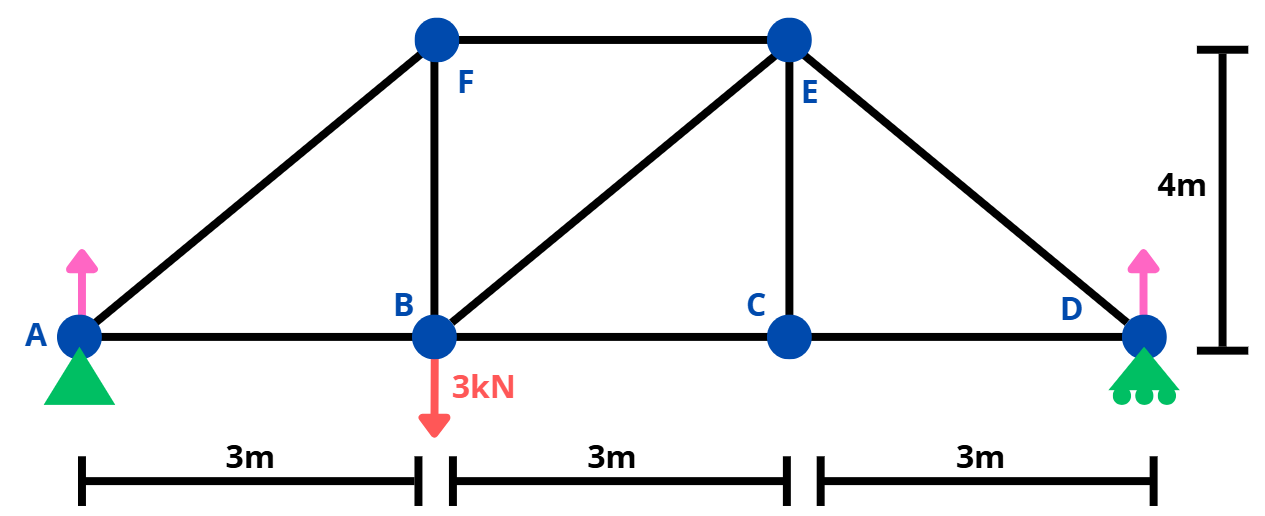

## Resolução pelo FTOOL
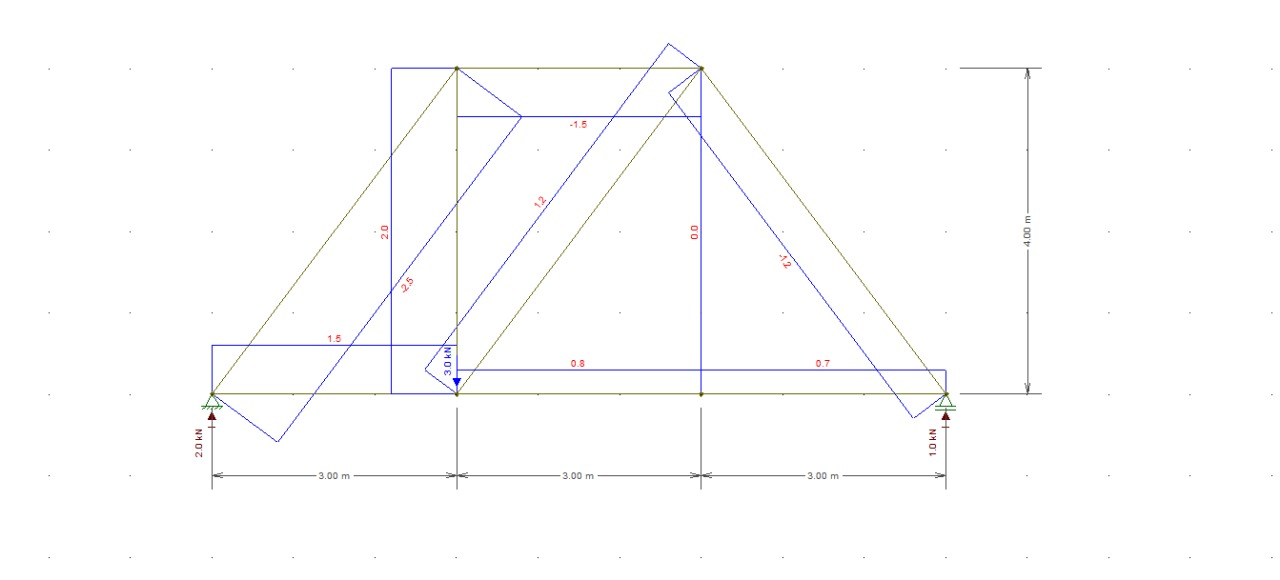

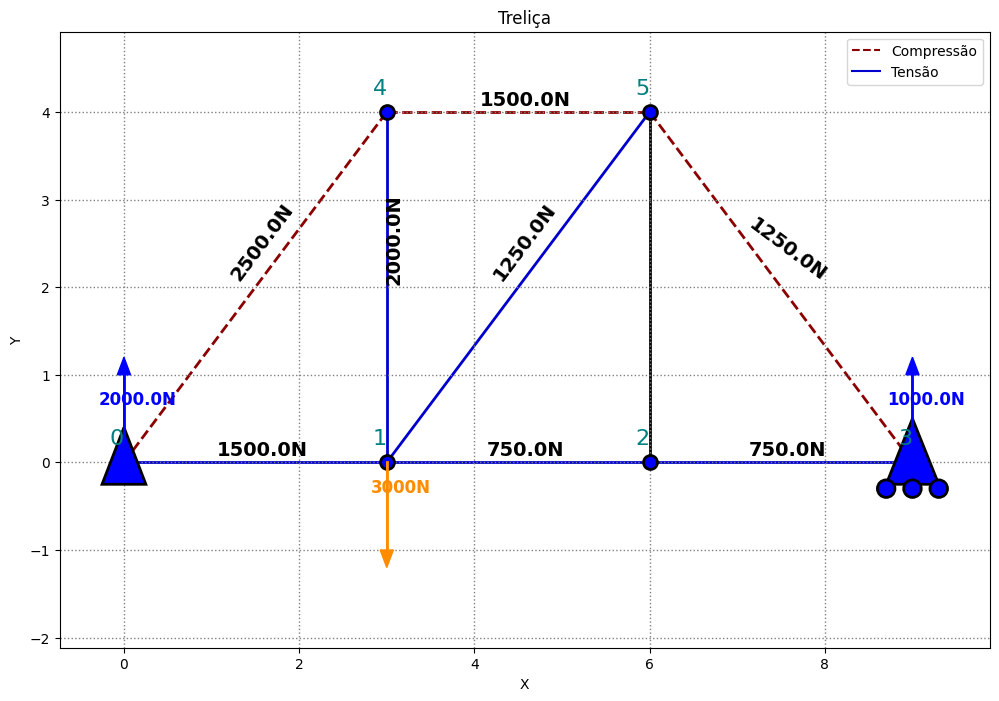

In [ ]:
# Definição dos nós
nodes = [
    Node(x=0, y=0, node_id=0, supports=[Support(rx=1, ry=1, rm=0)]),        # A
    Node(x=3, y=0, node_id=1, forces=[Force(magnitude=3000, angle=-90)]),   # B
    Node(x=6, y=0, node_id=2),                                              # C
    Node(x=9, y=0, node_id=3, supports=[Support(rx=0, ry=1, rm=0)]),        # D
    Node(x=3, y=4, node_id=4),                                              # E
    Node(x=6, y=4, node_id=5),                                              # F
]

# Definição das vigas
elements = [
    Element(nodes[0], nodes[1], element_id=0),   # AB
    Element(nodes[0], nodes[4], element_id=1),   # AF
    Element(nodes[1], nodes[2], element_id=2),   # BC
    Element(nodes[1], nodes[4], element_id=3),   # BF
    Element(nodes[1], nodes[5], element_id=4),   # BE
    Element(nodes[2], nodes[3], element_id=5),   # CD
    Element(nodes[2], nodes[5], element_id=6),   # CE
    Element(nodes[3], nodes[5], element_id=7),   # DE
    Element(nodes[4], nodes[5], element_id=8),   # FE
]

# Inicializa a treliça
truss = Truss(nodes=nodes, elements=elements)

# Resolve a treliça
system, solution = truss.analyze()

# Plot do resultados
plot_truss(truss, plot_forces=True, plot_supports=True, plot_loads=True)

# Exemplo de Treliça 2
___
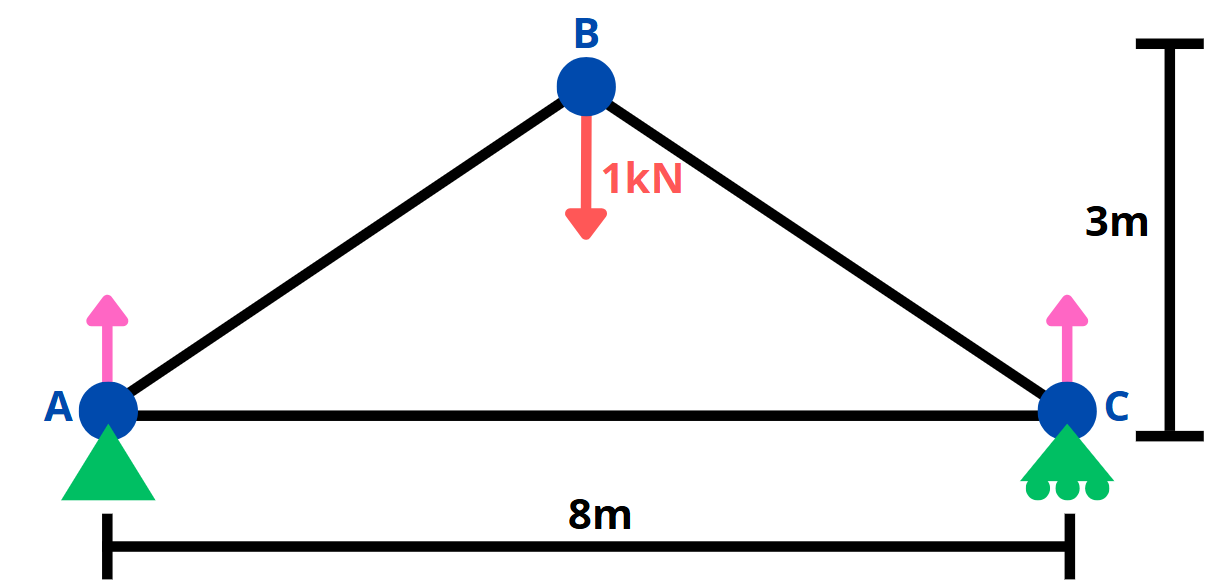

## Resolução pelo FTOOL
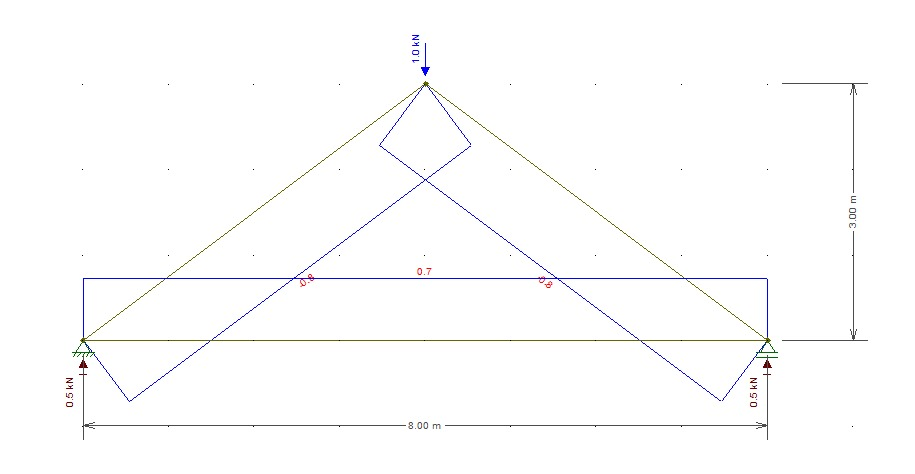

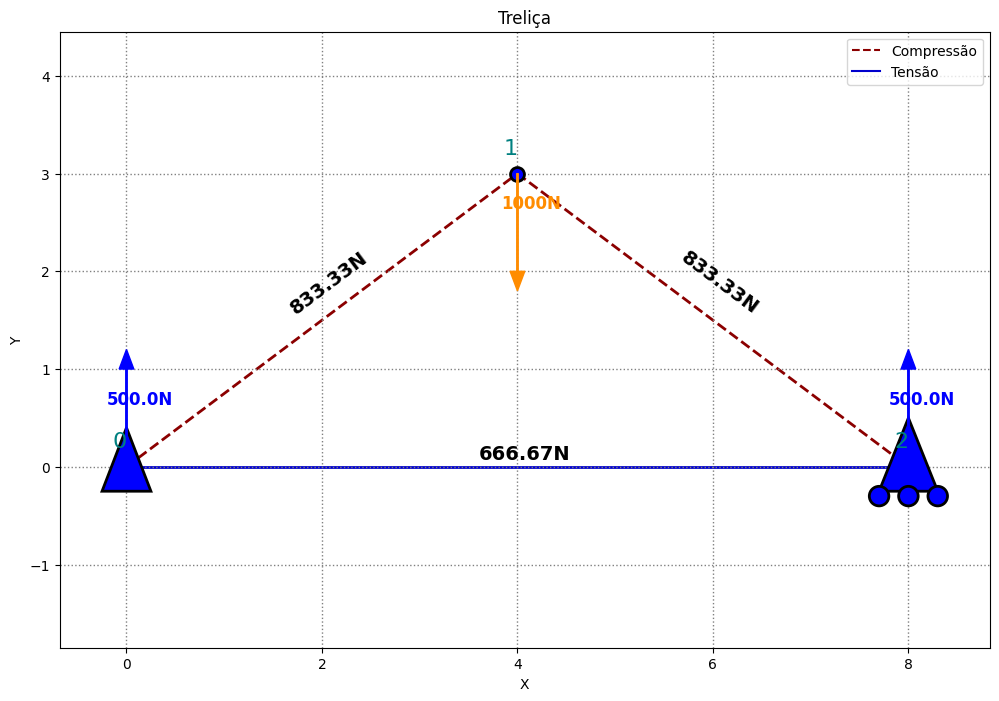

In [ ]:
# Definição dos nós
nodes = [
    Node(x=0, y=0, node_id=0, supports=[Support(rx=1, ry=1)]),             # A
    Node(x=4, y=3, node_id=1, forces=[Force(magnitude=1000, angle=-90)]),  # B
    Node(x=8, y=0, node_id=2, supports=[Support(rx=0, ry=1)]),             # C
]

# Definição das barras
elements = [
    Element(nodes[0], nodes[1], element_id=0),  # AB
    Element(nodes[1], nodes[2], element_id=1),  # BC
    Element(nodes[0], nodes[2], element_id=2),  # AC
]

# Inicializa a treliça
truss = Truss(nodes=nodes, elements=elements)

# Resolve a treliça
system, solution = truss.analyze()

# Plot do resultados
plot_truss(truss, plot_forces=True, plot_supports=True, plot_loads=True)

# Exemplo de Treliça 3
___
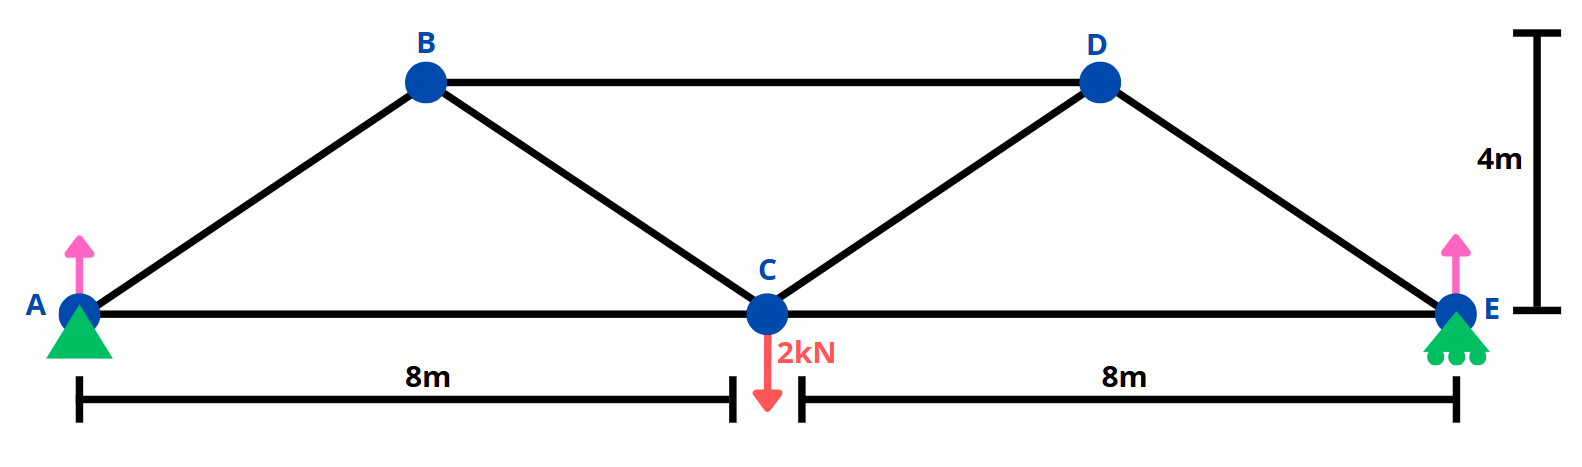

## Resolução pelo FTOOL
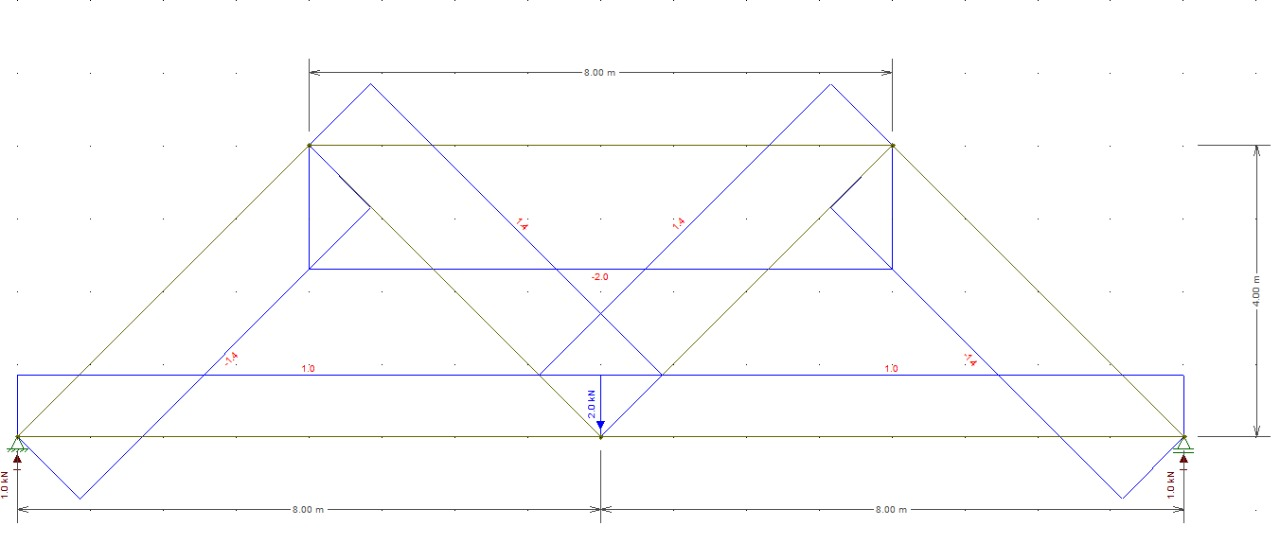

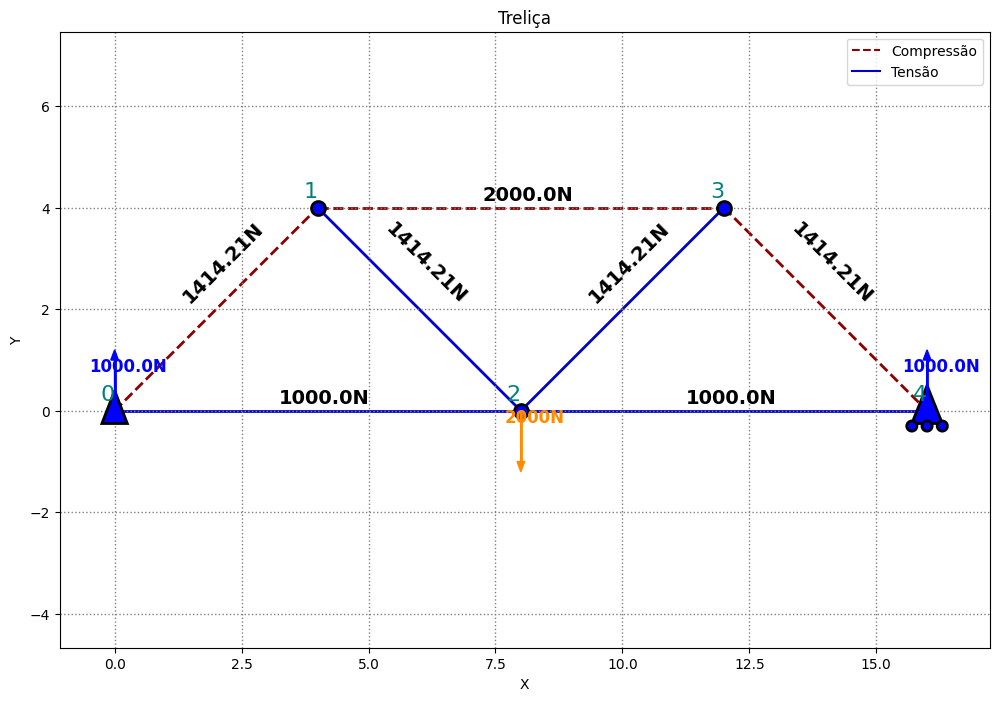

In [ ]:
# Definição dos nós
nodes = [
    Node(x=0, y=0, node_id=0, supports=[Support(rx=1, ry=1)]),             # A
    Node(x=4, y=4, node_id=1),                                             # B
    Node(x=8, y=0, node_id=2, forces=[Force(magnitude=2000, angle=-90)]),  # C
    Node(x=12, y=4, node_id=3),                                            # D
    Node(x=16, y=0, node_id=4, supports=[Support(rx=0, ry=1)]),            # E
]

# Definição das barras
elements = [
    Element(nodes[0], nodes[1], element_id=0),  # AB
    Element(nodes[1], nodes[2], element_id=1),  # BC
    Element(nodes[2], nodes[3], element_id=2),  # CD
    Element(nodes[3], nodes[4], element_id=3),  # DE
    Element(nodes[0], nodes[2], element_id=4),  # AC
    Element(nodes[1], nodes[3], element_id=5),  # BD
    Element(nodes[2], nodes[4], element_id=6),  # CE
]

# Inicializa a treliça
truss = Truss(nodes=nodes, elements=elements)

# Resolve a treliça
system, solution = truss.analyze()

# Plot do resultados
plot_truss(truss, plot_forces=True, plot_supports=True, plot_loads=True)
